# Policy Experiments

This notebook evaluates the baseline policies on the TestEnv environment.
We analyze the performance of simple arbitrary policies and how reward behaves on the long run. <br>

All algoritm code is implemented in `src/utils/policies.py`. <br>
This notebook only shows the direct implementation of an experiment and analysis of the results.

<mark> Note that the policy does not need to train. Experiments will solely be performed on the validation dataset </mark>

In [1]:
#We import the necessary libraries and modules
from src.utils.policies import hourly_policy, weekday_policy, epsilon_greedy_policy, time_policy
from src.env.TestEnv import HydroElectric_Test
from src.utils.visualizations import *
import numpy as np

In [2]:
#We set a random seed for reproducibility
SEED = 5
np.random.seed(SEED)

### Hourly policy

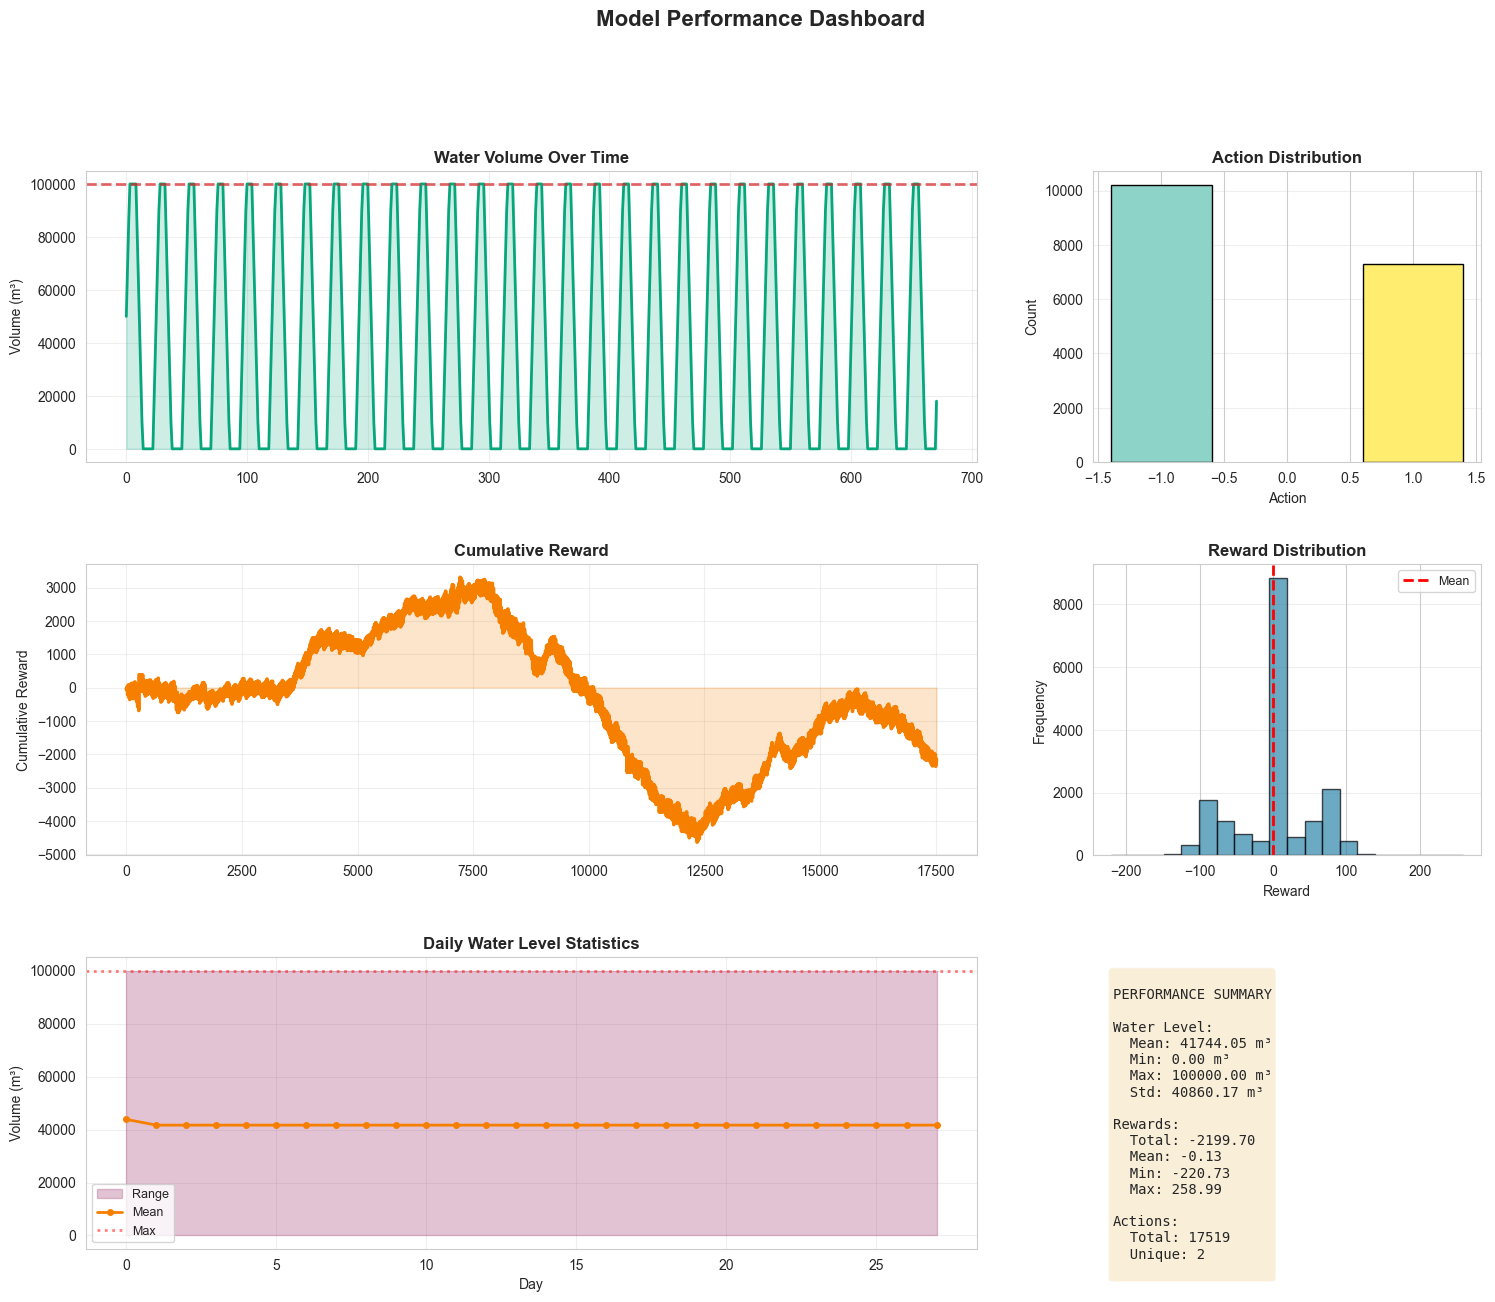

In [3]:
#We initialize the environment
env = HydroElectric_Test("data/validate.xlsx")
env.reset()
observation = env.observation()

rewards_hourly = []
actions = []
water_level = []

#We let the policy indicate the action at each time step and let it play through the entire dataset once
for i in range(len(env.test_data)*24 - 1):
    action = hourly_policy(observation)
    
    # The observation is the tuple: [volume, price, hour_of_day, day_of_week, day_of_year, month_of_year, year]
    next_observation, reward, terminated, truncated, info = env.step(action)

    rewards_hourly.append(reward)
    actions.append(action)
    water_level.append(observation[0])

    done = terminated or truncated
    observation = next_observation

create_performance_dashboard(water_level[:24*7*4], rewards_hourly, actions, max_volume = 100000)

### Weekday policy

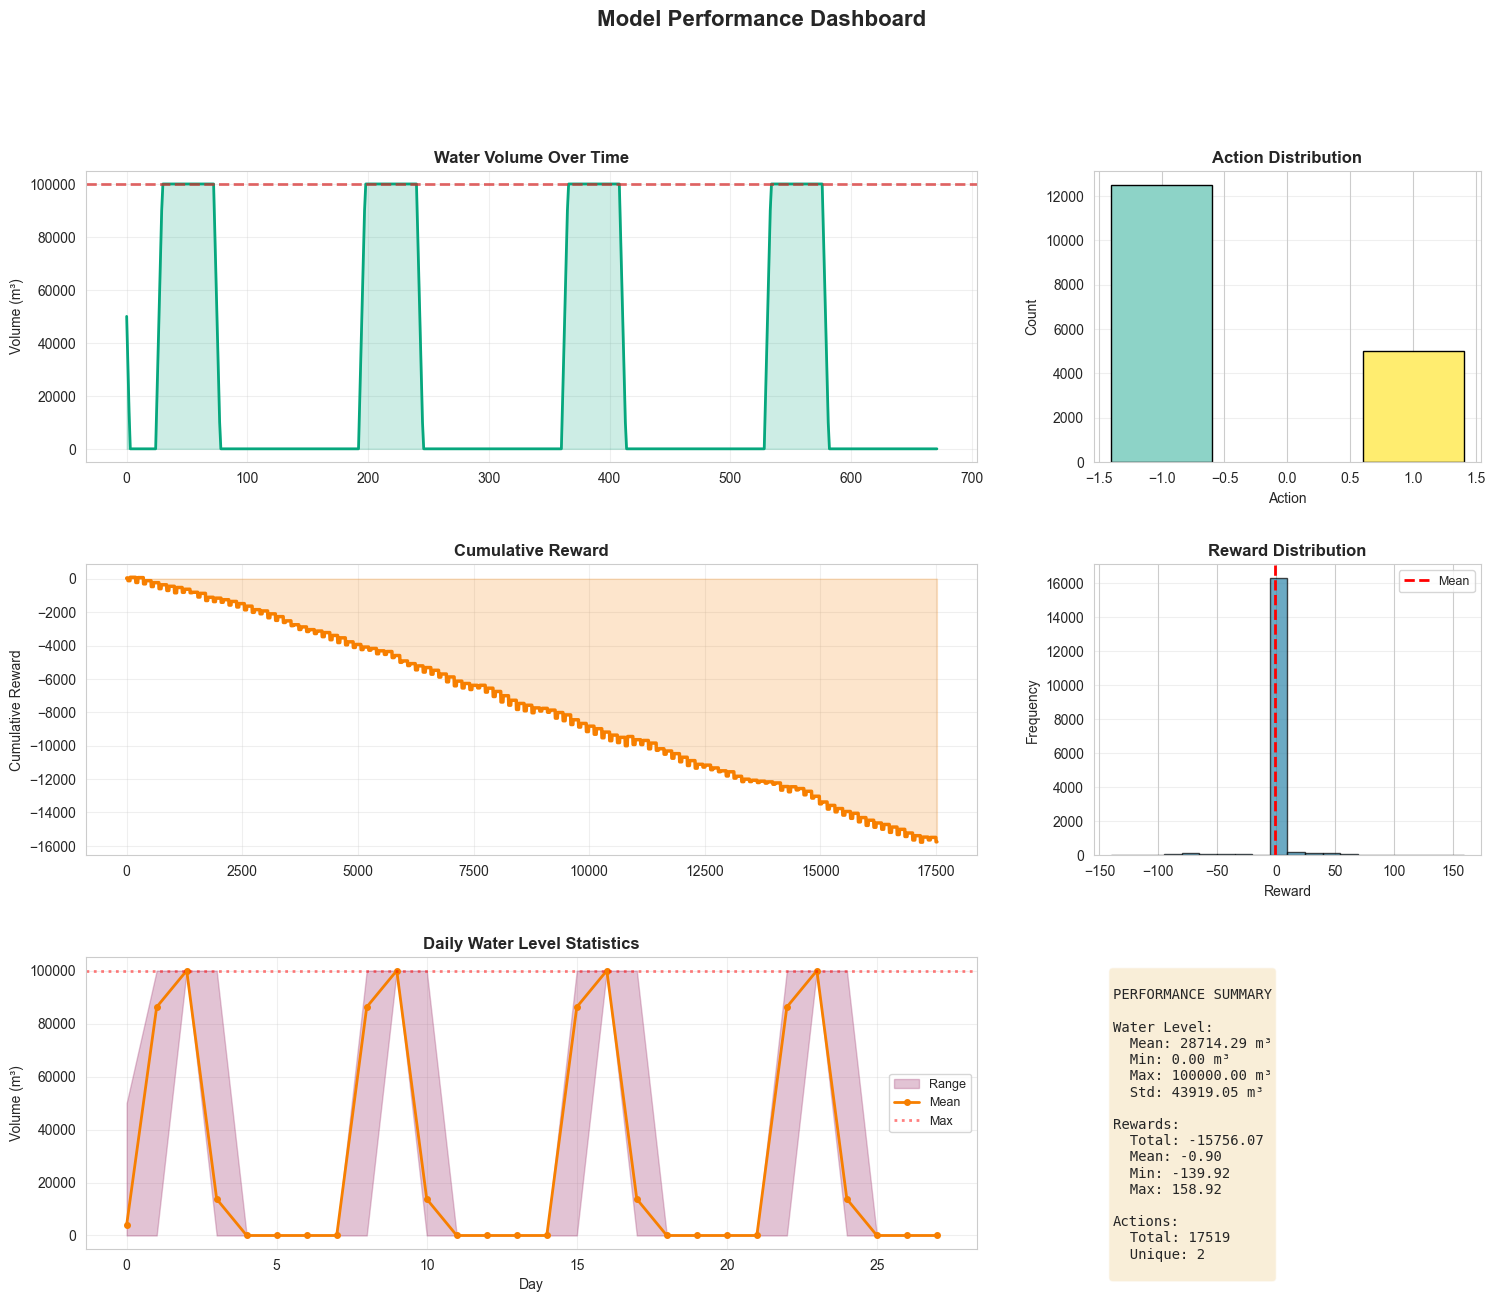

In [4]:
#We initialize the environment
env = HydroElectric_Test("data/validate.xlsx")
env.reset()
observation = env.observation()

rewards_weekday = []
actions = []
water_level = []

#We let the policy indicate the action at each time step and let it play through the entire dataset once
for i in range(len(env.test_data)*24 - 1):
    action = weekday_policy(observation)
    
    # The observation is the tuple: [volume, price, hour_of_day, day_of_week, day_of_year, month_of_year, year]
    next_observation, reward, terminated, truncated, info = env.step(action)

    rewards_weekday.append(reward)
    actions.append(action)
    water_level.append(observation[0])

    done = terminated or truncated
    observation = next_observation

create_performance_dashboard(water_level[:24*7*4], rewards_weekday, actions, max_volume = 100000)

### Epsilon greedy policy

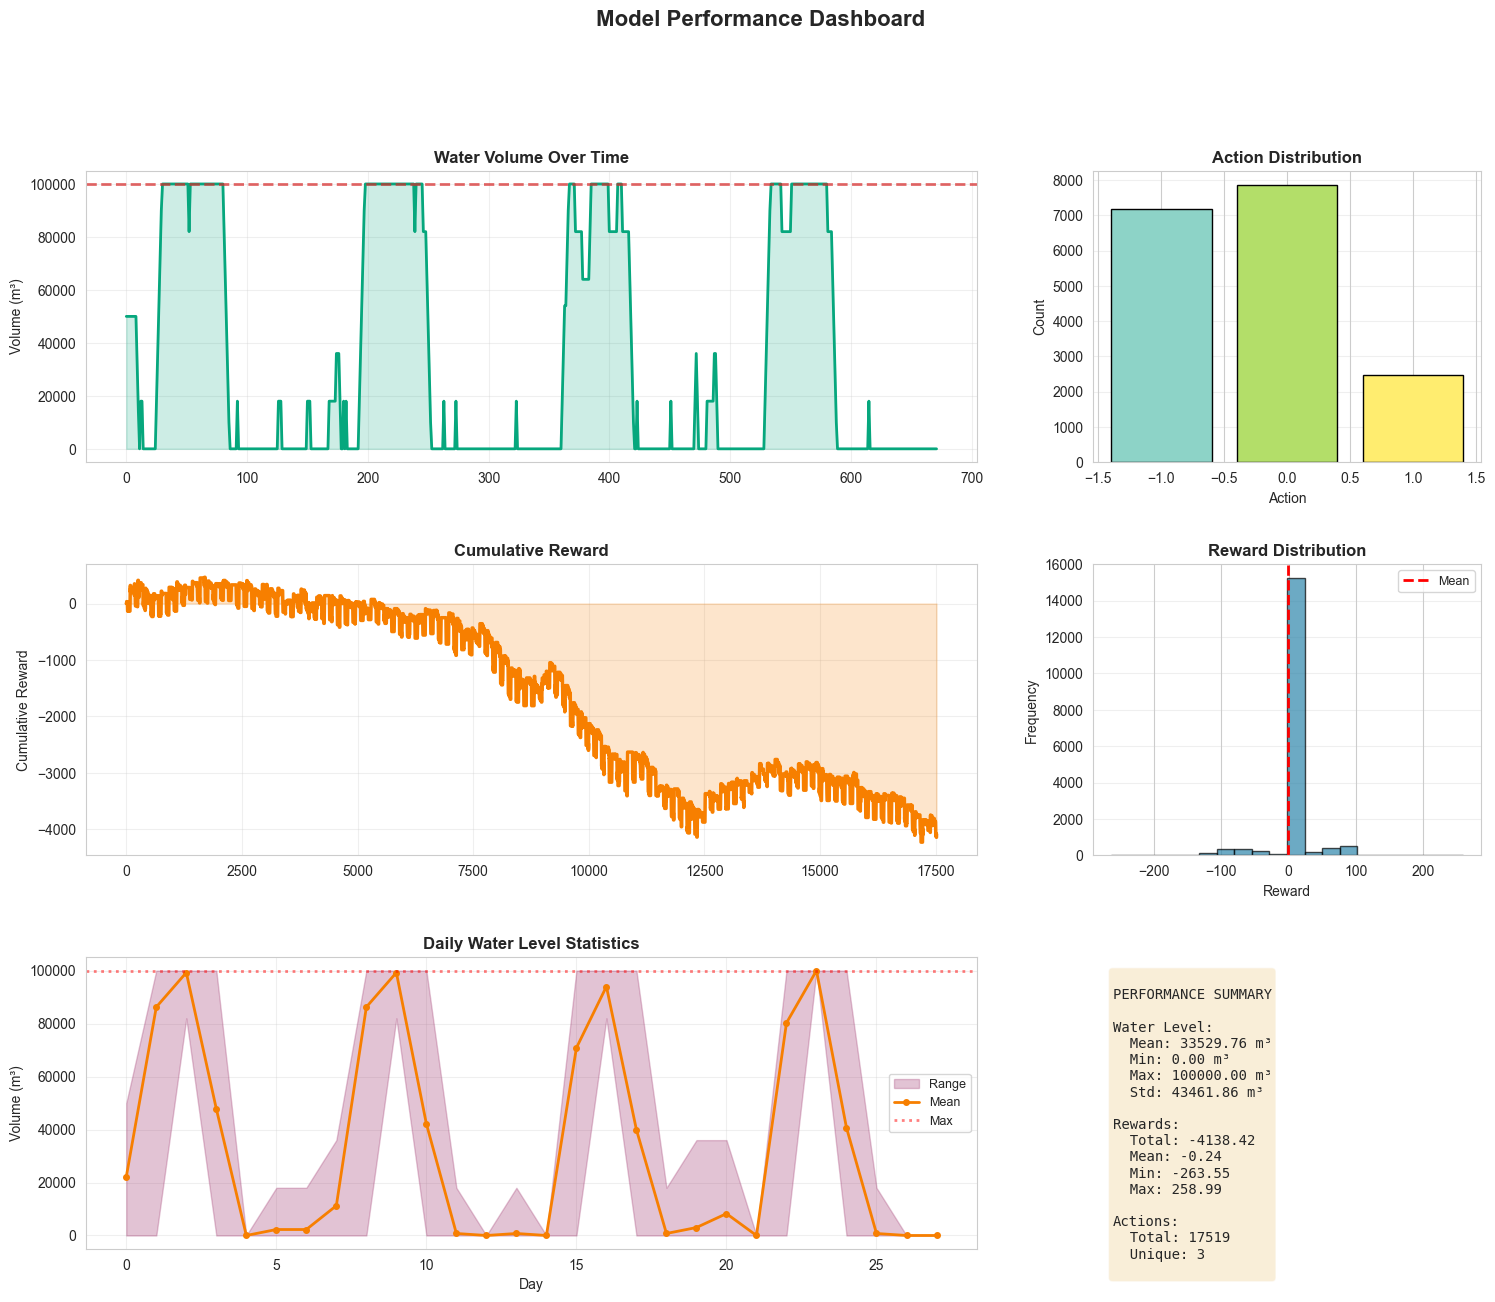

In [5]:
#We initialize the environment
env = HydroElectric_Test("data/validate.xlsx")
env.reset()
observation = env.observation()

rewards_greedy = []
actions = []
water_level = []

#We let the policy indicate the action at each time step and let it play through the entire dataset once
for i in range(len(env.test_data)*24 - 1):
    action = epsilon_greedy_policy(observation)
    
    # The observation is the tuple: [volume, price, hour_of_day, day_of_week, day_of_year, month_of_year, year]
    next_observation, reward, terminated, truncated, info = env.step(action)

    rewards_greedy.append(reward)
    actions.append(action)
    water_level.append(observation[0])

    done = terminated or truncated
    observation = next_observation

create_performance_dashboard(water_level[:24*7*4], rewards_greedy, actions, max_volume = 100000)

### Time policy

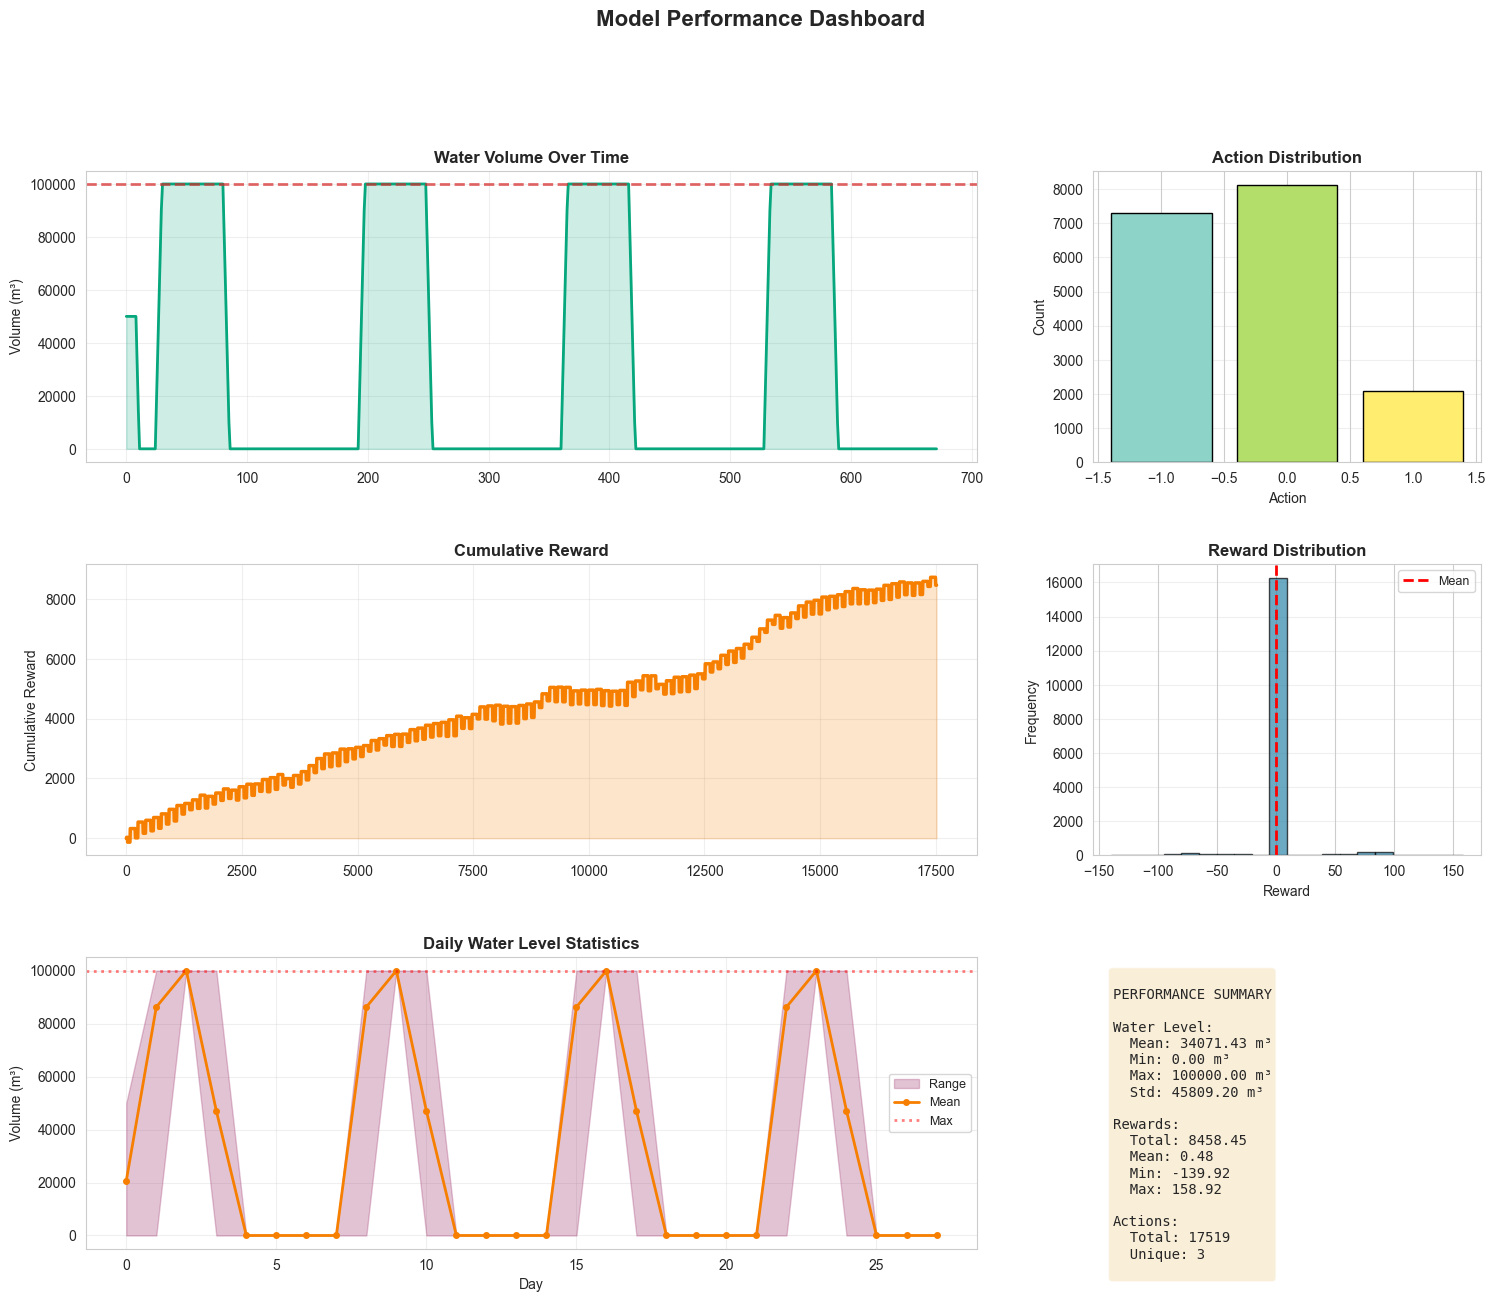

In [6]:
#We initialize the environment
env = HydroElectric_Test("data/validate.xlsx")
env.reset()
observation = env.observation()

rewards_time = []
actions = []
water_level = []

#We let the policy indicate the action at each time step and let it play through the entire dataset once
for i in range(len(env.test_data)*24 - 1):
    action = time_policy(observation)
    
    # The observation is the tuple: [volume, price, hour_of_day, day_of_week, day_of_year, month_of_year, year]
    next_observation, reward, terminated, truncated, info = env.step(action)

    rewards_time.append(reward)
    actions.append(action)
    water_level.append(observation[0])

    done = terminated or truncated
    observation = next_observation

create_performance_dashboard(water_level[:24*7*4], rewards_time, actions, max_volume = 100000)

### Performance comparison

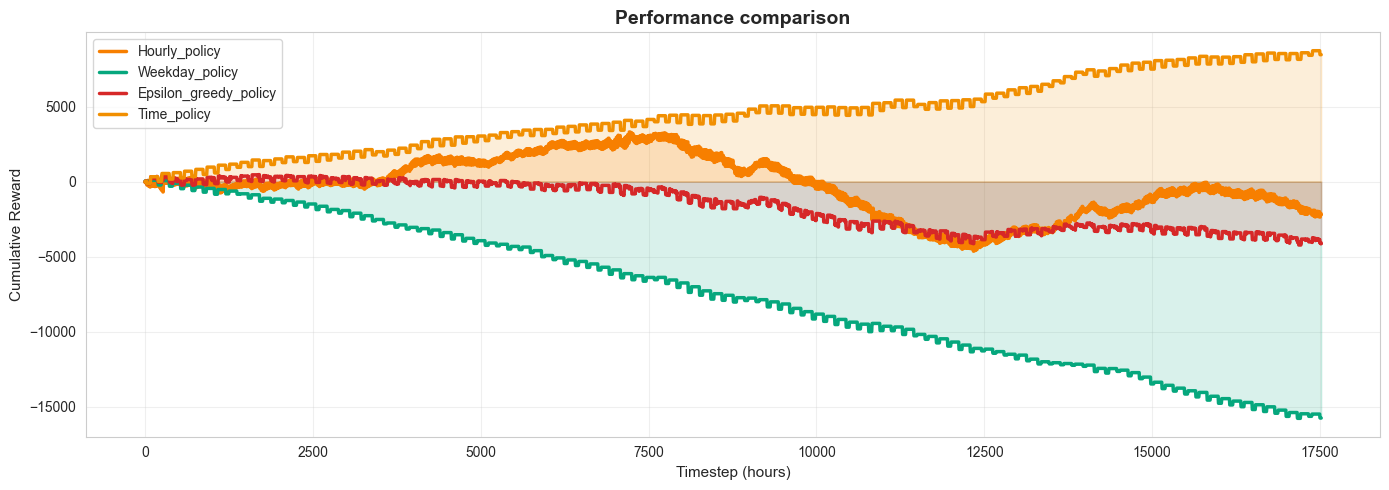

In [7]:
performance = {
    "Hourly_policy" : rewards_hourly,
    "Weekday_policy" : rewards_weekday,
    "Epsilon_greedy_policy" : rewards_greedy,
    "Time_policy" : rewards_time
}
plot_cumulative_rewards(performance, "Performance comparison")